посчитаем несколько продуктовых метрик и посмотрим, какие распределения могут встретиться на практике.

Задание
Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.
Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.
Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.
Проанализируйте CTR с разбивкой по рекламной кампании.
Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости. 
Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. 
Посчитайте конверсию из клика в покупку.
Описание данных
ad_id – идентификатор объявления (рекламы)
xyz_campaign_id – идентификатор рекламной кампании в базе компании X
fb_campaign_id – идентификатор кампании в Facebook
age – возрастная группа, которой показывалась реклама
gender – пол тех, кому показывалась реклама
interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес)
impressions – число показов
clicks – число кликов
spent – сумма, которую компания потратила на показ объявления 
total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
approved_conversion – количество людей, которые купили продукт после просмотра рекламы

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as scipy
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
conversion = pd.read_csv('/home/jupyter-a.komova-13/STAT/conversion.csv')

In [ ]:
#Загрузите данные, проверьте число наблюдений и столбцов, типы данных, 
#наличие пропущенных значений, какие уникальные значения встречаются.

#Сколько уникальных рекламных кампаний было проведено? 

#Note: использовать идентификатор кампании в базе Х – xyz_campaign_id.

In [4]:
conversion.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [6]:
conversion.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [8]:
conversion.shape

(1143, 11)

In [9]:
conversion.xyz_campaign_id.nunique()

3

In [13]:
conversion

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,log_impressions
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,8.902456
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,9.790375
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,6.541030
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,8.356790
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,8.326759
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,13.937527
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,13.365386
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,11.928546
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,13.580108


In [12]:
conversion['log_impressions'] = np.log(conversion.Impressions)

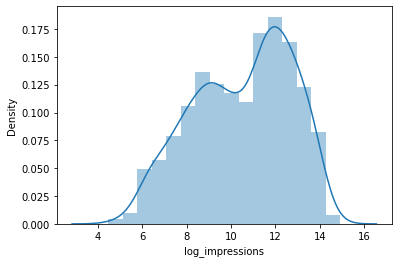

In [15]:
sns.distplot(conversion.log_impressions, kde = True)

In [ ]:
#Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения. 
#Выберите верные утверждения:

In [23]:
a = conversion.groupby('fb_campaign_id', as_index = False).agg({'log_impressions':'sum'})

In [24]:
a

,fb_campaign_id,log_impressions
0,103916,8.902456
1,103917,9.790375
2,103920,6.541030
3,103928,16.683548
4,103929,7.557473
...,...,...
686,179977,13.937527
687,179978,13.365386
688,179979,11.928546
689,179981,13.580108


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


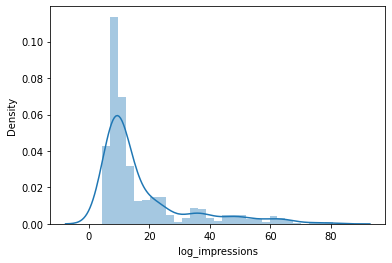

In [26]:
sns.distplot(a.log_impressions, kde = True)

In [ ]:
#Теперь посчитаем ещё несколько полезных метрик. 
#Первая – CTR (click-through rate), которая показывает кликабельность, 
#т.е. отношение числа кликов к количеству показов.

In [27]:
conversion['CTR'] = conversion.Clicks / conversion.Impressions

In [28]:
conversion.CTR.describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: CTR, dtype: float64

In [29]:
conversion.CTR.idxmax()

150

In [33]:
conversion.ad_id.iloc[conversion.CTR.idxmax()]

738637

In [ ]:
#Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). 
#Какому графику соответствует распределение CTR кампании 916?

In [34]:
b = conversion.query("xyz_campaign_id == '916'")

In [35]:
b

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,log_impressions,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,8.902456,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,9.790375,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,6.541030,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,8.356790,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,8.326759,0.000242
5,708820,916,103929,30-34,M,29,1915,0,0.00,1,1,7.557473,0.000000
6,708889,916,103940,30-34,M,15,15615,3,4.77,1,0,9.655987,0.000192
7,708895,916,103941,30-34,M,16,10951,1,1.27,1,1,9.301186,0.000091
8,708953,916,103951,30-34,M,27,2355,1,1.50,1,0,7.764296,0.000425
9,708958,916,103952,30-34,M,28,9502,3,3.16,1,0,9.159258,0.000316


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


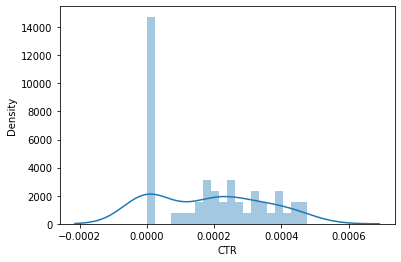

In [36]:
sns.distplot(b.CTR, kde = True, bins = 20)

In [ ]:
#CPC (cost-per-click) – стоимость за клик пользователя по объявлению. 
#Рассчитывается путём деления суммы потраченных денег на общее число кликов

#Выведите описательные статистики для новой переменной, посмотрите на форму распределения. 
#В ответе укажите межквартильный размах, округленный до двух знаков после точки.

#Обратите внимание, что в столбце могут встретиться NaN. 
#Если вы используете функцию iqr из scipy, то следует указать аргумент nan_policy='omit', чтобы их проигнорировать. 
#При построении графика необходимо использовать метод .dropna().

In [38]:
conversion['CPC'] = conversion.Spent / conversion.Clicks

In [39]:
conversion

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,log_impressions,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,8.902456,0.000136,1.430000
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,9.790375,0.000112,0.910000
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,6.541030,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,8.356790,0.000235,1.250000
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,8.326759,0.000242,1.290000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,13.937527,0.000223,1.421389
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,13.365386,0.000188,1.449000
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,11.928546,0.000185,1.438929
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,13.580108,0.000171,1.471926


In [40]:
c = conversion.dropna()

In [41]:
c

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,log_impressions,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,8.902456,0.000136,1.430000
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,9.790375,0.000112,0.910000
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,8.356790,0.000235,1.250000
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,8.326759,0.000242,1.290000
6,708889,916,103940,30-34,M,15,15615,3,4.770000,1,0,9.655987,0.000192,1.590000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,13.937527,0.000223,1.421389
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,13.365386,0.000188,1.449000
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,11.928546,0.000185,1.438929
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,13.580108,0.000171,1.471926


In [42]:
c.CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


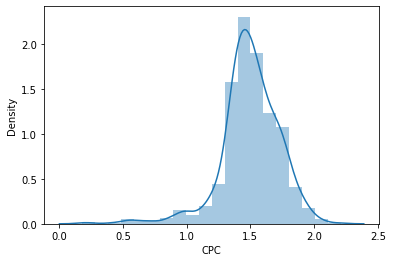

In [43]:
sns.distplot(c.CPC, kde = True, bins = 20)

In [49]:
scipy.stats.iqr(c.CPC, nan_policy='omit').round(2)

0.25

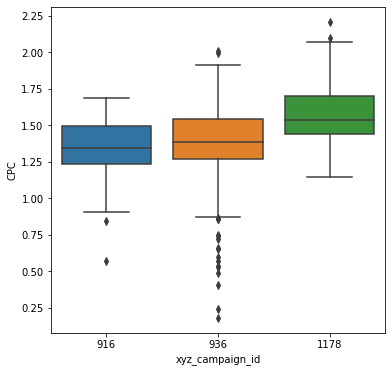

In [51]:
plt.figure(figsize=[6,6])

sns.boxplot(data = conversion, x = 'xyz_campaign_id', y = 'CPC')

In [ ]:
#Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. Какой график получился?

In [55]:
m = c.query('gender == "M"')

In [56]:
f = c.query('gender == "F"')

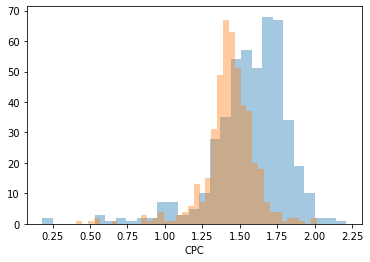

In [58]:
sns.distplot(m.CPC, kde = False)
sns.distplot(f.CPC, kde = False)